In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("COVID_19_DATA.csv")
data

/Users/tiffanynatasha/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,AR,5.0,BOONE,5009.0,0 - 17 years,NaN,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,NaN,NaN
1,2021-10,MO,29.0,PHELPS,29161.0,0 - 17 years,NaN,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,Unknown,NaN
2,2020-10,MO,29.0,CASS,29037.0,0 - 17 years,Female,NaN,NaN,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Unknown,Missing,Unknown,NaN
3,2021-08,TN,47.0,CLAIBORNE,47025.0,0 - 17 years,Female,Missing,Missing,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4,2020-11,GA,13.0,EFFINGHAM,13103.0,0 - 17 years,Female,Unknown,Missing,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37532067,2020-11,SD,46.0,NaN,NaN,65+ years,Male,White,Unknown,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,NaN
37532068,2020-11,SD,46.0,NaN,NaN,65+ years,Male,White,Unknown,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,NaN
37532069,2020-11,SD,46.0,NaN,NaN,65+ years,Male,White,Unknown,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,NaN
37532070,2020-11,SD,46.0,NaN,NaN,65+ years,Male,White,Unknown,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,NaN


In [3]:
data = data.dropna()
data

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
134,2021-02,NC,37.0,MONTGOMERY,37123.0,18 to 49 years,Female,White,Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Unknown,No,Yes
135,2021-04,OH,39.0,MONTGOMERY,39113.0,18 to 49 years,Female,White,Hispanic/Latino,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes
147,2020-05,IA,19.0,SIOUX,19167.0,50 to 64 years,Male,White,Hispanic/Latino,1.0,0.0,Clinical evaluation,Yes,Laboratory-confirmed case,Symptomatic,Yes,No,No,Yes
256,2020-04,IA,19.0,WOODBURY,19193.0,0 - 17 years,Male,White,Hispanic/Latino,2.0,0.0,Clinical evaluation,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,Yes
279,2020-11,MN,27.0,POLK,27119.0,18 to 49 years,Female,Unknown,Missing,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,Missing,Missing,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33145729,2021-05,NY,36.0,KINGS,36047.0,18 to 49 years,Male,White,Unknown,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,Yes
33147606,2021-10,NY,36.0,KINGS,36047.0,65+ years,Male,White,Unknown,1.0,0.0,Missing,Missing,Probable Case,Symptomatic,Missing,Missing,Missing,Yes
33147624,2021-10,NY,36.0,KINGS,36047.0,65+ years,Male,White,Unknown,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,Yes
33147741,2021-10,NY,36.0,KINGS,36047.0,65+ years,Male,White,Unknown,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,Yes


In [4]:
#data["case_month"] = data["case_month"].replace({np.nan:"Missing"})
#data["res_state"] = data["res_state"].replace({np.nan:"Missing"})
#data["state_fips_code"] = data["state_fips_code"].replace({np.nan:"Missing"})
#data["res_county"] = data["res_county"].replace({np.nan:"Missing"})
#data["county_fips_code"] = data["county_fips_code"].replace({np.nan:"Missing"})
#data["age_group"] = data["age_group"].replace({np.nan:"Missing"})
data = data.rename(columns = {"sex":"male"})
data["male"] = data["male"].replace({"Unknown":np.nan, "Other":np.nan, "Missing":np.nan, "Male":1, "Female":0, })
#data["male"] = data[data["male"] != "Missing"]
data["race"] = data["race"].replace({"Unknown":np.nan, "Missing":np.nan})
#data["race"] = data[data["race"] != "Missing"]
data["ethnicity"] = data["ethnicity"].replace({"Unknown":np.nan, "Missing": np.nan})
#data["ethnicity"] = data[data["ethnicity"] != "Missing"]
data = data.dropna()
data["case_positive_specimen_interval"] = data["case_positive_specimen_interval"].replace({"Missing":np.nan})
data["case_onset_interval"] = data["case_onset_interval"].replace({"Missing":np.nan})
data["process"] = data["process"].replace({"Unknown":"Missing", "Missing":np.nan})
data["exposure_yn"] = data["exposure_yn"].replace({"Unknown":0, "Missing":0, "Yes":1, "Missing":np.nan})
data["current_status"] = data["current_status"].replace({"Laboratory-confirmed case":1, "Probable Case":1})
data["symptom_status"] = data["symptom_status"].replace({"Symptomatic":1, "nul":0, "Missing":0})
data["hosp_yn"] = data["hosp_yn"].replace({"Unknown":np.nan, "No":0, "Missing":np.nan, "Yes":1})
data["icu_yn"] = data["icu_yn"].replace({"Unknown":np.nan, "nul":np.nan, "No":0, "Missing":np.nan, "Yes":1})
data["death_yn"] = data["death_yn"].replace({"Unknown":np.nan, "Missing":np.nan, "No":0, "Yes":1})
data["underlying_conditions_yn"] = data["underlying_conditions_yn"].replace({"No":0, "Yes":1})

data

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,male,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
134,2021-02,NC,37.0,MONTGOMERY,37123.0,18 to 49 years,0.0,White,Hispanic/Latino,0.0,0.0,NaN,NaN,1,1,0.0,NaN,0.0,1
135,2021-04,OH,39.0,MONTGOMERY,39113.0,18 to 49 years,0.0,White,Hispanic/Latino,0.0,0.0,NaN,1.0,1,1,0.0,NaN,0.0,1
147,2020-05,IA,19.0,SIOUX,19167.0,50 to 64 years,1.0,White,Hispanic/Latino,1.0,0.0,Clinical evaluation,1.0,1,1,1.0,0.0,0.0,1
256,2020-04,IA,19.0,WOODBURY,19193.0,0 - 17 years,1.0,White,Hispanic/Latino,2.0,0.0,Clinical evaluation,1.0,1,1,0.0,0.0,0.0,1
445,2021-07,NV,32.0,CLARK,32003.0,0 - 17 years,0.0,Black,Hispanic/Latino,0.0,0.0,Routine surveillance,1.0,1,1,0.0,0.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33043977,2020-07,NY,36.0,KINGS,36047.0,65+ years,1.0,White,Non-Hispanic/Latino,1.0,0.0,NaN,NaN,1,1,1.0,NaN,NaN,1
33044022,2021-06,NY,36.0,KINGS,36047.0,65+ years,1.0,White,Non-Hispanic/Latino,0.0,0.0,NaN,NaN,1,1,1.0,1.0,NaN,1
33044103,2021-06,NY,36.0,KINGS,36047.0,65+ years,1.0,White,Non-Hispanic/Latino,0.0,0.0,NaN,NaN,1,1,NaN,NaN,NaN,1
33044148,2021-06,NY,36.0,KINGS,36047.0,65+ years,1.0,White,Non-Hispanic/Latino,0.0,0.0,NaN,NaN,1,1,1.0,NaN,NaN,1


In [5]:
data = data.drop(columns = ["res_state", "res_county"])


In [6]:
data["case_month"] = pd.to_datetime(data["case_month"])
data["male"] = data["male"].astype(int)
data = data.rename(columns = {"ethnicity":"HispanicLatino"})
data["HispanicLatino"] = data["HispanicLatino"].replace({"Hispanic/Latino":1, "Non-Hispanic/Latino":0})
data["HispanicLatino"] = data["HispanicLatino"].astype(int)
data = data.dropna()
data

,case_month,state_fips_code,county_fips_code,age_group,male,race,HispanicLatino,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
147,2020-05-01,19.0,19167.0,50 to 64 years,1,White,1,1.0,0.0,Clinical evaluation,1.0,1,1,1.0,0.0,0.0,1
256,2020-04-01,19.0,19193.0,0 - 17 years,1,White,1,2.0,0.0,Clinical evaluation,1.0,1,1,0.0,0.0,0.0,1
538,2020-12-01,39.0,39039.0,18 to 49 years,1,White,1,1.0,0.0,Clinical evaluation,1.0,1,1,0.0,0.0,0.0,1
802,2020-06-01,20.0,20037.0,18 to 49 years,0,White,1,0.0,0.0,Routine surveillance,1.0,1,1,0.0,0.0,0.0,1
1296,2020-08-01,20.0,20111.0,18 to 49 years,0,White,1,1.0,0.0,Multiple,1.0,1,1,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32956272,2021-05-01,32.0,32003.0,65+ years,1,White,0,1.0,0.0,Multiple,1.0,1,1,1.0,0.0,1.0,1
32956434,2021-05-01,32.0,32003.0,65+ years,1,White,0,0.0,0.0,Multiple,1.0,1,1,1.0,0.0,0.0,1
32956602,2021-05-01,32.0,32003.0,65+ years,1,White,0,1.0,0.0,Routine surveillance,1.0,1,1,0.0,0.0,0.0,1
32956691,2021-05-01,32.0,32003.0,65+ years,1,White,0,0.0,0.0,Multiple,1.0,1,1,1.0,0.0,1.0,1


,death_yn
case_month,
2020-03-01,1054
2020-04-01,3314
2020-05-01,3053
2020-06-01,5820
2020-07-01,7248
2020-08-01,5047
2020-09-01,5281
2020-10-01,10205
2020-11-01,9440


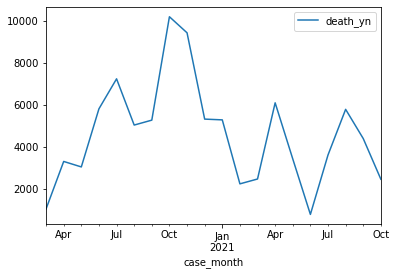

In [25]:
grouped7 = data[data["death_yn"] == 1]
grouped7 = data[['case_month', "death_yn"]]
grouped7 = grouped7.groupby(by = "case_month").count()
#grouped7 = grouped7.sort_values(by = "death_yn", ascending = False)
grouped7.plot()
grouped7

,Count of Death Cases
age_group,
18 to 49 years,15
50 to 64 years,82
65+ years,1238


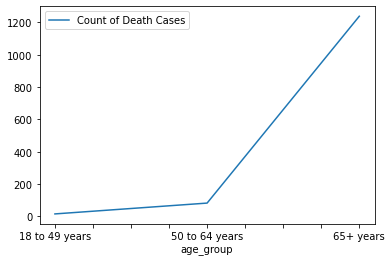

In [11]:
#Visualization based on age
grouped1 = data[data["death_yn"] == 1]
grouped1 = grouped1[['age_group', 'death_yn']].groupby(by = "age_group").count().rename(columns = {"death_yn" : "Count of Death Cases"})
grouped1.plot()
grouped1

,Count of Death Cases
age_group,
0 - 17 years,8184
18 to 49 years,50197
50 to 64 years,20212
65+ years,13838


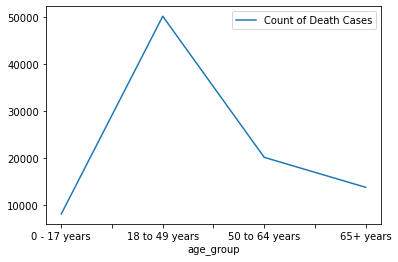

In [13]:
grouped11 = data[['age_group', 'death_yn']].groupby(by = "age_group").count().rename(columns = {"death_yn" : "Count of Death Cases"})
grouped11.plot()
grouped11

In [18]:
grouped6 = data[["icu_yn", "death_yn"]]
grouped6 = grouped6.groupby(by = ["icu_yn"]).sum()
grouped6

,death_yn
icu_yn,
0.0,781.0
1.0,554.0


<AxesSubplot:xlabel='race'>

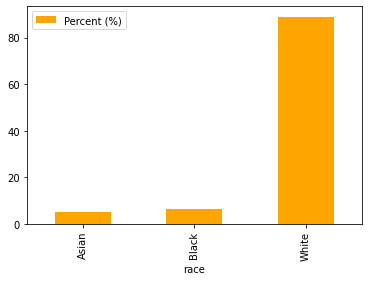

In [27]:
#Visualization by race
grouped2 = data[data["death_yn"] == 1]
grouped2 = grouped2[['race', 'death_yn']].groupby(by = "race").count().rename(columns = {"death_yn" : "Count of Death Cases"})
grouped2["sum"] = np.sum(grouped2["Count of Death Cases"])
grouped2["Percent (%)"] = (grouped2["Count of Death Cases"] / grouped2["sum"]) * 100
grouped2 = grouped2[["Percent (%)"]]
grouped2.plot(kind = "bar", color = "orange")

<AxesSubplot:xlabel='male'>

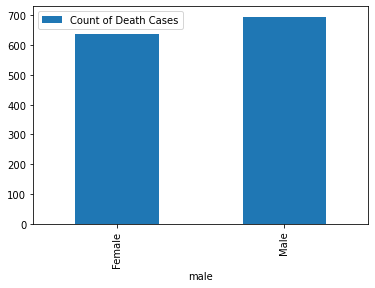

In [28]:
#Visualization by gender
grouped3 = data[data["death_yn"] == 1]
grouped3 = grouped3[['male', 'death_yn']].groupby(by = "male").count().rename(columns = {"death_yn" : "Count of Death Cases"})
grouped3 = grouped3.rename({0: "Female", 1:"Male"})
grouped3.plot(kind = "bar")

In [33]:
vaccine = pd.read_csv("vaccine.csv")
vaccine

,State,County,Geographic Area Name,GEOID,ReportNH,Valid,WholeNum,WhiteNum,NHWhiteNum,BlackNum,...,EP_NOVEH,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4,RPL_THEMES,hesitancy,strong_hesitancy,NotInHighMobility,positivity
0,California,Alameda,"Alameda, California",6001,1.0,1,1671329,823593,512134,184368,...,0.096,0.2548,0.0239,0.9806,0.9160,0.4701,0.09,0.03,0.0,1.38
1,California,Amador,"Amador, California",6005,1.0,1,39752,35636,30742,1066,...,0.055,0.3901,0.3754,0.6192,0.7510,0.5334,0.12,0.05,1.0,0.00
2,California,Contra Costa,"Contra Costa, California",6013,1.0,1,1153526,751283,492393,110064,...,0.055,0.2478,0.1410,0.9564,0.4795,0.4057,0.09,0.04,1.0,1.94
3,California,Del Norte,"Del Norte, California",6015,1.0,1,27812,21720,17236,980,...,0.096,0.8787,0.6765,0.8017,0.9968,0.9713,0.15,0.06,1.0,0.00
4,California,Fresno,"Fresno, California",6019,1.0,1,999101,765202,286049,57976,...,0.085,0.9242,0.6905,0.9892,0.8440,0.9611,0.13,0.05,1.0,3.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,Wisconsin,Brown,"Brown, Wisconsin",55009,0.0,1,264542,232249,212441,7874,...,0.055,0.1366,0.2757,0.7297,0.5482,0.3299,0.17,0.10,1.0,3.63
1137,Wisconsin,Bayfield,"Bayfield, Wisconsin",55007,0.0,1,15036,12835,12661,94,...,0.033,0.1873,0.2996,0.2964,0.0732,0.0990,0.17,0.10,1.0,3.92
1138,Wisconsin,Barron,"Barron, Wisconsin",55005,0.0,1,45244,43096,42086,711,...,0.059,0.2484,0.5753,0.2974,0.5307,0.3271,0.18,0.11,1.0,2.72
1139,Wisconsin,Ashland,"Ashland, Wisconsin",55003,0.0,1,15562,13042,12790,83,...,0.094,0.4850,0.6275,0.2805,0.7886,0.5500,0.17,0.10,1.0,2.01


In [34]:
vaccine = vaccine[["State", "County", "GEOID", "WholeNum", "NHWhiteNum", "WhiteNum", "BlackNum", "CvdVax_WhiteRate", "CvdVax_NHWhiteRate", "CvdVax_MBlackRate", "HighSchool_WholeRate", "Bachelor_WholeRate", "HighSchool_WhiteRate", "Bachelor_WhiteRate", "HighSchool_NHWhiteRate", "Bachelor_NHWhiteRate", "HighSchool_BlackRate", "Bachelor_BlackRate", "Unempl_WholeRate", "Unempl_WhiteRate", "Unempl_NHWhiteRate", "Unempl_BlackRate", "MeanInc_WholeAvg", "MeanInc_WhiteAvg", "MeanInc_NHWhiteAvg", "MeanInc_BlackAvg", "poorhealth_WholeRate", "AvgTrafficVolume", "inaccessibility", "urban", "republican_rate", "hesitancy"]]
vaccine

,State,County,GEOID,WholeNum,NHWhiteNum,WhiteNum,BlackNum,CvdVax_WhiteRate,CvdVax_NHWhiteRate,CvdVax_MBlackRate,...,MeanInc_WholeAvg,MeanInc_WhiteAvg,MeanInc_NHWhiteAvg,MeanInc_BlackAvg,poorhealth_WholeRate,AvgTrafficVolume,inaccessibility,urban,republican_rate,hesitancy
0,California,Alameda,6001,1671329,512134,823593,184368,NaN,15.799918,43.423278,...,47314.0,58792.0,66814.0,34574.0,0.145,1620.679707,0.333652,1.0,17.705595,0.09
1,California,Amador,6005,39752,30742,35636,1066,NaN,9.665287,47.543438,...,31987.0,34736.0,35857.0,2226.0,0.175,50.499343,0.222222,0.0,60.913819,0.12
2,California,Contra Costa,6013,1153526,492393,751283,110064,NaN,13.154736,52.612639,...,48178.0,57429.0,64996.0,34862.0,0.138,1015.809698,0.077682,1.0,26.302324,0.09
3,California,Del Norte,6015,27812,17236,21720,980,NaN,4.517350,15.364163,...,23674.0,24264.0,27307.0,23335.0,0.159,57.394244,0.495702,0.0,56.418093,0.15
4,California,Fresno,6019,999101,286049,765202,57976,NaN,8.472167,40.464731,...,24422.0,26855.0,39223.0,20281.0,0.234,335.741700,0.505571,1.0,45.082221,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,Wisconsin,Brown,55009,264542,212441,232249,7874,28.007010,NaN,7.150114,...,32874.0,35491.0,36517.0,13846.0,0.141,310.965824,0.106017,1.0,52.823187,0.17
1137,Wisconsin,Bayfield,55007,15036,12661,12835,94,39.992209,NaN,14.893617,...,31825.0,33917.0,34347.0,17085.0,0.145,34.819916,0.063992,0.0,42.482517,0.17
1138,Wisconsin,Barron,55005,45244,42086,43096,711,23.586876,NaN,4.641350,...,29681.0,30442.0,30624.0,15712.0,0.103,76.770307,0.354664,0.0,62.420508,0.18
1139,Wisconsin,Ashland,55003,15562,12790,13042,83,32.679037,NaN,19.277108,...,23946.0,25313.0,25582.0,3110.0,0.105,104.357591,0.475645,0.0,43.977559,0.17


<AxesSubplot:xlabel='State'>

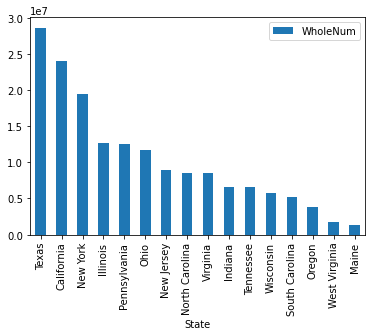

In [31]:

grouped3 = vaccine[['State','WholeNum']].groupby(by = "State").sum()
grouped3 = grouped3.sort_values(by = "WholeNum", ascending = False)
grouped3.plot(kind = "bar")

<ipython-input-40-04575bcb5e2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine["CvdVax_White"] = vaccine["CvdVax_WhiteRate"] * vaccine["WhiteNum"] /100
<ipython-input-40-04575bcb5e2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine["CvdVax_Black"] = vaccine["CvdVax_MBlackRate"] * vaccine["BlackNum"] /100
<ipython-input-40-04575bcb5e2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

<AxesSubplot:xlabel='Race'>

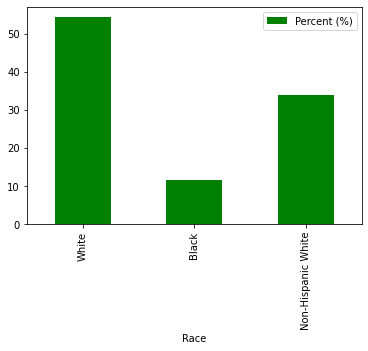

In [40]:
vaccine["CvdVax_White"] = vaccine["CvdVax_WhiteRate"] * vaccine["WhiteNum"] /100
vaccine["CvdVax_Black"] = vaccine["CvdVax_MBlackRate"] * vaccine["BlackNum"] /100
vaccine["CvdVax_NHWhite"] = vaccine["CvdVax_NHWhiteRate"] * vaccine["NHWhiteNum"] /100


whitenum = np.sum(vaccine["CvdVax_White"])
blacknum = np.sum(vaccine["CvdVax_Black"])
nhwhitenum = np.sum(vaccine["CvdVax_NHWhite"])
grouped4 = pd.DataFrame({'Race': ["White", "Black", "Non-Hispanic White"], 'Count': [whitenum, blacknum, nhwhitenum]})
grouped4 = grouped4.set_index('Race')
grouped4["sum"] = np.sum(grouped4["Count"])
grouped4["Percent (%)"] = (grouped4["Count"]/grouped4["sum"])*100
grouped4 = grouped4[["Percent (%)"]]
grouped4.plot(kind = "bar", color = "green")

<ipython-input-52-edd8fae73e1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine["CvdVax_White"] = vaccine["CvdVax_White"].replace({np.nan:0})
<ipython-input-52-edd8fae73e1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine["CvdVax_Black"] = vaccine["CvdVax_Black"].replace({np.nan:0})
<ipython-input-52-edd8fae73e1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,sum
State,
New York,3.738521e+06
Illinois,3.352037e+06
Texas,3.019648e+06
Ohio,2.600024e+06
Indiana,2.313816e+06
Pennsylvania,2.262186e+06
North Carolina,1.610538e+06
New Jersey,1.576491e+06
Wisconsin,1.405463e+06


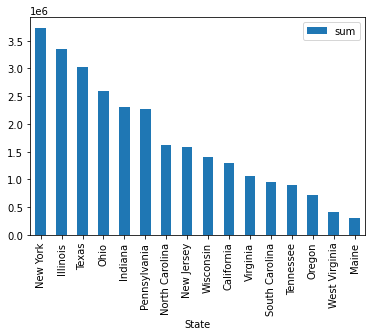

In [52]:
vaccine["CvdVax_White"] = vaccine["CvdVax_White"].replace({np.nan:0})
vaccine["CvdVax_Black"] = vaccine["CvdVax_Black"].replace({np.nan:0})
vaccine["CvdVax_NHWhite"] = vaccine["CvdVax_NHWhite"].replace({np.nan:0})
vaccine["sum"] = vaccine["CvdVax_White"] + vaccine["CvdVax_Black"] + vaccine["CvdVax_NHWhite"]
grouped3 = vaccine[['State','sum']].groupby(by = "State").sum()
grouped3 = grouped3.sort_values(by = "sum", ascending = False)
grouped3.plot(kind = "bar")
grouped3

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92431 entries, 147 to 32957130
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   case_month                       92431 non-null  datetime64[ns]
 1   state_fips_code                  92431 non-null  float64       
 2   county_fips_code                 92431 non-null  float64       
 3   age_group                        92431 non-null  object        
 4   male                             92431 non-null  int64         
 5   race                             92431 non-null  object        
 6   HispanicLatino                   92431 non-null  int64         
 7   case_positive_specimen_interval  92431 non-null  float64       
 8   case_onset_interval              92431 non-null  float64       
 9   process                          92431 non-null  object        
 10  exposure_yn                      92431 non-null  floa

In [9]:
covid_train, covid_test = train_test_split(data, test_size=0.25, random_state=88)
covid_train.shape, covid_test.shape

((69323, 17), (23108, 17))

In [10]:
def TPR(cm):
    return (cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2]))
def FPR(cm):
    return (cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0]))

In [11]:
#Baseline Model

In [12]:
death_yes = np.count_nonzero(covid_train["death_yn"] == 1)
death_no = np.count_nonzero(covid_train["death_yn"] == 0)
acc_bm = death_no / (death_yes + death_no)
acc_bm

0.985199717265554

In [13]:
#Logistic Regression

In [14]:
logreg1 = smf.logit(formula = 'death_yn ~ state_fips_code + county_fips_code + age_group \
+ male + race + HispanicLatino + process + exposure_yn + icu_yn',
                       data = covid_train).fit()
print(logreg1.summary())

         Current function value: 0.044123
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               death_yn   No. Observations:                69323
Model:                          Logit   Df Residuals:                    69299
Method:                           MLE   Df Model:                           23
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.4273
Time:                        14:43:02   Log-Likelihood:                -3058.7
converged:                      False   LL-Null:                       -5341.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                        -17.5002     28.632    

/Users/tiffanynatasha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
#Remove process
logreg2 = smf.logit(formula = 'death_yn ~ state_fips_code + county_fips_code + age_group \
+ male + race + HispanicLatino + exposure_yn + icu_yn',
                       data = covid_train).fit()
print(logreg2.summary())

         Current function value: 0.044580
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               death_yn   No. Observations:                69323
Model:                          Logit   Df Residuals:                    69308
Method:                           MLE   Df Model:                           14
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.4214
Time:                        14:43:03   Log-Likelihood:                -3090.4
converged:                      False   LL-Null:                       -5341.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                        -59.2529   2.01e+06  -2

/Users/tiffanynatasha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
#Remove race
logreg3 = smf.logit(formula = 'death_yn ~ state_fips_code + county_fips_code + age_group \
+ male + HispanicLatino + exposure_yn + icu_yn',
                       data = covid_train).fit()
print(logreg3.summary())

         Current function value: 0.044750
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               death_yn   No. Observations:                69323
Model:                          Logit   Df Residuals:                    69313
Method:                           MLE   Df Model:                            9
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.4192
Time:                        14:43:03   Log-Likelihood:                -3102.2
converged:                      False   LL-Null:                       -5341.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -25.1949   4924.439     -0.005      0.996   -9676.918    9626.528
age_group[T.18

/Users/tiffanynatasha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
#Remove age
logreg4 = smf.logit(formula = 'death_yn ~ case_month + state_fips_code + county_fips_code + \
+ male + HispanicLatino + exposure_yn + icu_yn + hosp_yn + underlying_conditions_yn + case_positive_specimen_interval + case_onset_interval',
                       data = covid_train).fit()
print(logreg4.summary())

Optimization terminated successfully.
         Current function value: 0.052380
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:               death_yn   No. Observations:                69323
Model:                          Logit   Df Residuals:                    69293
Method:                           MLE   Df Model:                           29
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.3201
Time:                        14:43:04   Log-Likelihood:                -3631.1
converged:                       True   LL-Null:                       -5341.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                          

In [18]:
#Remove case_onset_interval
logreg5 = smf.logit(formula = 'death_yn ~ case_month + state_fips_code + county_fips_code + \
+ male + HispanicLatino + exposure_yn + icu_yn + hosp_yn + underlying_conditions_yn + case_positive_specimen_interval',
                       data = covid_train).fit()
print(logreg5.summary())

Optimization terminated successfully.
         Current function value: 0.052383
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:               death_yn   No. Observations:                69323
Model:                          Logit   Df Residuals:                    69294
Method:                           MLE   Df Model:                           28
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.3201
Time:                        14:43:04   Log-Likelihood:                -3631.4
converged:                       True   LL-Null:                       -5341.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                          

In [19]:
#Remove case_positive_specimen_interval
#Remove age
logreg6 = smf.logit(formula = 'death_yn ~ case_month + state_fips_code + county_fips_code + \
+ male + HispanicLatino + exposure_yn + icu_yn + hosp_yn + underlying_conditions_yn',
                       data = covid_train).fit()
print(logreg6.summary())

Optimization terminated successfully.
         Current function value: 0.052389
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:               death_yn   No. Observations:                69323
Model:                          Logit   Df Residuals:                    69295
Method:                           MLE   Df Model:                           27
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.3200
Time:                        14:43:05   Log-Likelihood:                -3631.7
converged:                       True   LL-Null:                       -5341.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                          

In [36]:
y_prob = logreg1.predict(covid_test)
y_pred = pd.Series([1 if x > 1/3 else 0 for x in y_prob], index=y_prob.index)

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_test = covid_test['death_yn']

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
acc_logit = accuracy_score(y_test, y_pred)
acc_logit

Confusion Matrix : 
 [[22681   118]
 [  211    98]]


0.9857625064912584

In [22]:
y_train = covid_train['death_yn']
X_train = covid_train.drop(['death_yn'], axis=1)

y_test = covid_test['death_yn']
X_test = covid_test.drop(['death_yn'], axis=1)

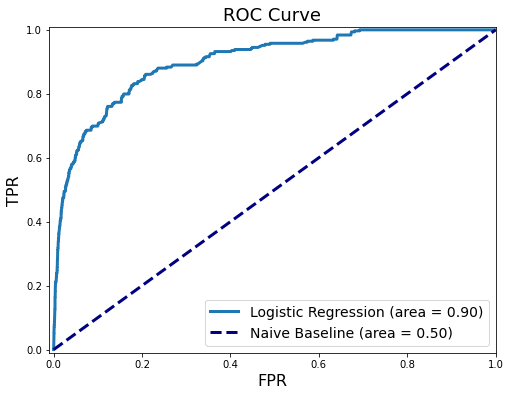

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [24]:
#LDA

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92431 entries, 147 to 32957130
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   case_month                       92431 non-null  datetime64[ns]
 1   state_fips_code                  92431 non-null  float64       
 2   county_fips_code                 92431 non-null  float64       
 3   age_group                        92431 non-null  object        
 4   male                             92431 non-null  int64         
 5   race                             92431 non-null  object        
 6   HispanicLatino                   92431 non-null  int64         
 7   case_positive_specimen_interval  92431 non-null  float64       
 8   case_onset_interval              92431 non-null  float64       
 9   process                          92431 non-null  object        
 10  exposure_yn                      92431 non-null  floa

In [26]:
from sklearn.preprocessing import OneHotEncoder
# initialize the OneHotEncoder
drop_enc = OneHotEncoder(drop='first').fit(X_train[['age_group','race','process']])
print(drop_enc.categories_)

[array(['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years'],
      dtype=object), array(['American Indian/Alaska Native', 'Asian', 'Black',
       'Multiple/Other', 'Native Hawaiian/Other Pacific Islander',
       'White'], dtype=object), array(['Clinical evaluation', 'Contact tracing of case patient',
       'Laboratory reported', 'Missing', 'Multiple', 'Other',
       'Other detection method (specify)', 'Provider reported',
       'Routine physical examination', 'Routine surveillance'],
      dtype=object)]


In [27]:
# Perform the transformation for both the training and the test set.

X_train_categorical = drop_enc.transform(X_train[['age_group','race','process']]).toarray()
X_train_numerical = X_train[['state_fips_code', 'county_fips_code', 'male', 'HispanicLatino', 'case_positive_specimen_interval', 'case_onset_interval', 'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']].values
# combine the numerical variables and the one-hot encoded categorical variables
X_train_transformed = np.concatenate((X_train_numerical,X_train_categorical), axis = 1)

X_test_categorical = drop_enc.transform(X_test[['age_group','race','process']]).toarray()
X_test_numerical = X_test[['state_fips_code', 'county_fips_code', 'male', 'HispanicLatino', 'case_positive_specimen_interval', 'case_onset_interval', 'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']].values
X_test_transformed = np.concatenate((X_test_numerical,X_test_categorical), axis = 1)

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_transformed, y_train)

y_prob_lda = lda.predict_proba(X_test_transformed)
y_pred_lda = pd.Series([1 if x > 1/3 else 0 for x in y_prob_lda[:,1]], index=y_prob.index)

cm = confusion_matrix(y_test, y_pred_lda)
print ("Confusion Matrix: \n", cm)
acc_lda = accuracy_score(y_test, y_pred_lda)
acc_lda

Confusion Matrix: 
 [[22399   400]
 [  183   126]]


0.9747706422018348

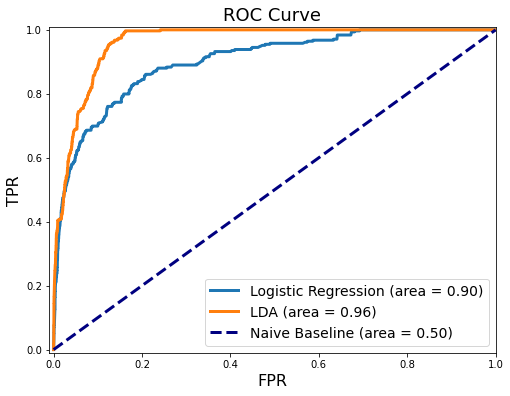

In [29]:
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda[:,1])
roc_auc_lda = auc(fpr_lda, tpr_lda)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot(fpr_lda, tpr_lda, lw=3, label='LDA (area = {:0.2f})'.format(roc_auc_lda))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [30]:
#CART

In [31]:
data_enc = pd.get_dummies(data, columns = ['age_group','race','process'])

In [32]:
from sklearn.model_selection import train_test_split

y = data_enc['death_yn']
X = data_enc.drop(['death_yn','case_month'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,  
                                                    stratify=data_enc['death_yn'],
                                                    random_state=88,)
X_train.shape, X_test.shape

((69323, 32), (23108, 32))

In [33]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [34]:
from sklearn.model_selection import GridSearchCV
#Here is all the parameters we use for our model
grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{0: 1, 1: 20}],
               'random_state': [88]}

            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1) # default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_acc.fit(X_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


KeyboardInterrupt: 

In [ ]:
acc = dtc_cv_acc.cv_results_['mean_test_score'] 
ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data

In [ ]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc.best_score_)

In [ ]:
print('Node count =', dtc_cv_acc.best_estimator_.tree_.node_count)

plt.figure(figsize=(20,10))
plot_tree(dtc_cv_acc.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

In [ ]:
y_pred = dtc_cv_acc.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)
acc_cart = accuracy_score(y_test, y_pred)
acc_cart

In [ ]:
#Random Forest

In [ ]:
## using GridSearchCV to find best max_features:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import time

grid_values = {'max_features': np.linspace(1,18,18, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

tic = time.time()

rf2 = RandomForestRegressor() 
# Note: here we set verbose=2 to keep track of the progress (the running time) of the cross validation. 
cv = KFold(n_splits=5,random_state=333,shuffle=True) 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv,verbose=2)
rf_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

In [ ]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 19])
#plt.ylim([0.3, 0.6])

In [ ]:
y_pred = dtc_cv_acc.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)
acc_rf = accuracy_score(y_test, y_pred)
acc_rf

In [ ]:
data = {'Model':['Baseline Model', 'Logistic Regression', 'LDA', 'CART', 'Random Forest'],
        'Accuracy':[acc_bm, acc_logit, acc_lda, acc_cart, acc_rf]}
  
# Create DataFrame
result = pd.DataFrame(data)
result